<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
#First have a look on the data : Head
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
#First have a look on the data : Tail
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [11]:
#First have a look on the data : Describe
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
#First have a look on the data : Info
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [13]:
#First have a look on the data : Shape
np.shape(boston_df)

(506, 14)

In [14]:
#First have a look on the data : Drop the Unnamed column
boston_df.drop('Unnamed: 0', axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town  
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
·      INDUS - proportion of non-retail business acres per town.  
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
·      NOX - nitric oxides concentration (parts per 10 million)  
·      RM - average number of rooms per dwelling  
·      AGE - proportion of owner-occupied units built prior to 1940  
·      DIS - weighted distances to five Boston employment centres  
·      RAD - index of accessibility to radial highways  
·      TAX - full-value property-tax rate per $10,000  

·      PTRATIO - pupil-teacher ratio by town  
·      LSTAT - percentage lower status of the population  
·      MEDV - Median value of owner-occupied homes in \$1000's

### Task 2

#### 1/5 - For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

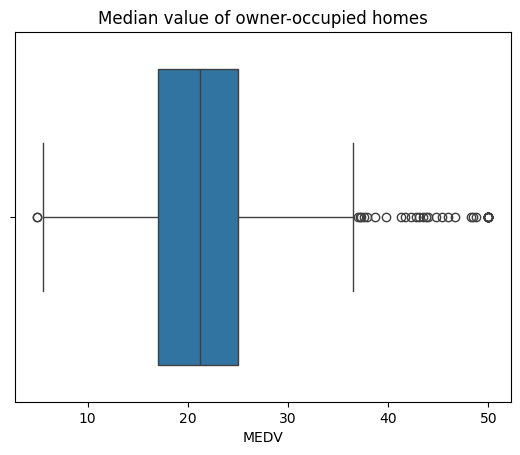

In [15]:
ax1 = sns.boxplot(x='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')

#### 2/5 - Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles river variable bar plot')

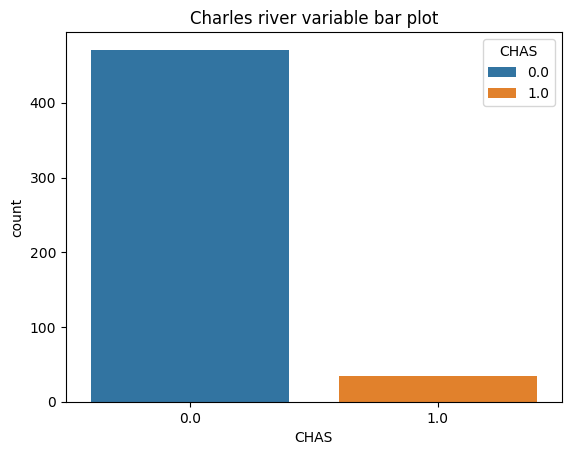

In [16]:
ax2 = sns.countplot(x='CHAS', hue='CHAS', data=boston_df)
plt.title('Charles river variable bar plot')
# Charles river variable : 1 if tract bounds river; 0 otherwise

#### 3/5 - Provide a boxplot for the MEDV variable vs the AGE variable.
Discretize the age variable into three groups of :
- 35 years and younger,  
- between 35 and 70 years and
- 70 years and older

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '< 35 years old'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '> 70 years old'

In [18]:
#ag = boston_df.groupby('age_group')

Text(0.5, 1.0, 'MEDV variable vs AGE GROUPS variable boxplot')

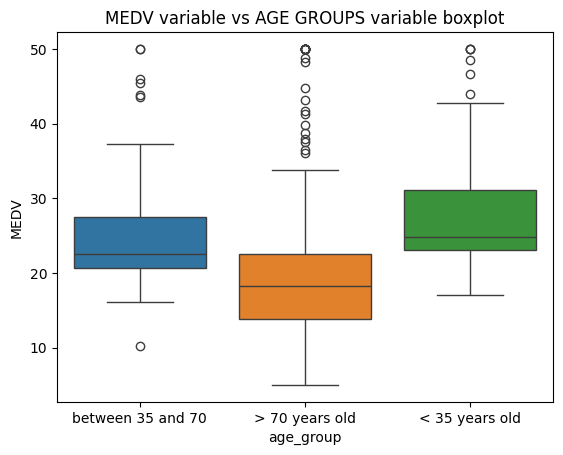

In [19]:
ax3 = sns.boxplot(x='age_group', y='MEDV', hue='age_group', data=boston_df)
plt.title('MEDV variable vs AGE GROUPS variable boxplot')

#### 4/5 - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?
- Where there is a low non-retail business proportion, there is also a low NOX concentration, which means that both are strongly correlated.
- Near 20 acres per town, we have a NOX spike
- We should examine what kind of non-retail businesses are in that area of 18-20 acres

Text(0.5, 1.0, 'Nitric oxide concentrations and proportion of non-retail business acres per town scatterplot')

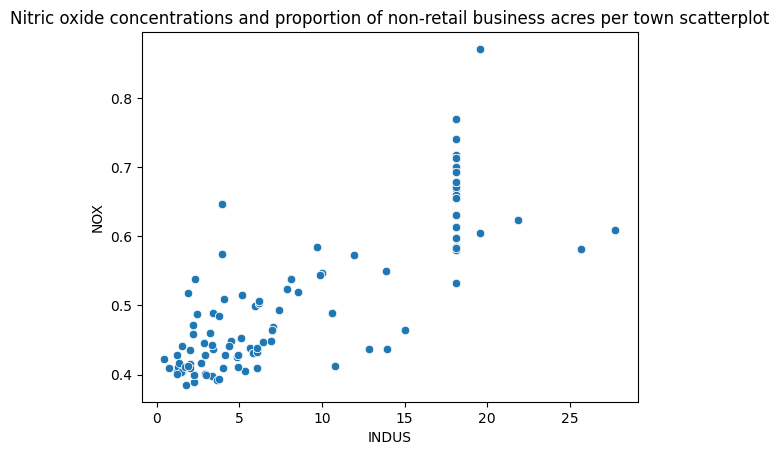

In [20]:
ax4 = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric oxide concentrations and proportion of non-retail business acres per town scatterplot')

#### 5/5 - Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'pupil to teacher ratio variable histogram')

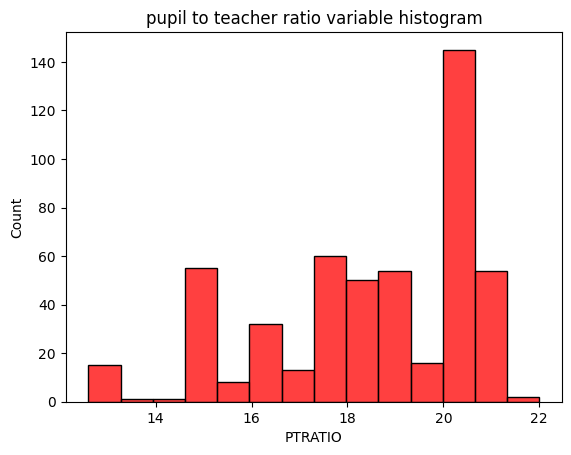

In [21]:
ax5 = sns.histplot(boston_df['PTRATIO'],color='red')
plt.title('pupil to teacher ratio variable histogram')

### Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

#### 1/4 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- H0 - Null Hypothesis : There is no significant difference
- H1 = Alternative Hypothesis : There is a significant difference

#### Conclusions  
Since the p-value in Levene is lower than 0.05, the equal_var in the T-test turned **False**.  
We reject the Null Hypothesis while there is a significant difference in median value of houses bounded by the Charles river.

In [22]:
#Levene test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [23]:
#T-test independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### 2/4 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- H0 : There is no difference for each proportion  
- H1 : There is a difference for at leat one proportion

#### Conclusions  
Since p-value of Levene is higher than 0.05, the variance is equal  
Since p-value of ANOVA is higher than 0.05, we fail to reject the Null Hypothesis

In [24]:
#Levene - check equal_var
scipy.stats.levene(boston_df[boston_df['age_group'] == '< 35 years old']['MEDV'],
boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
boston_df[boston_df['age_group'] == '> 70 years old']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [25]:
# separate age_group variables - to run a one-way ANOVA
U35 = boston_df[boston_df['age_group'] == '< 35 years old']['MEDV']
U70 = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
Over70 = boston_df[boston_df['age_group'] == '> 70 years old']['MEDV']

In [26]:
#ANOVA
f_statistic, p_value = scipy.stats.f_oneway(U35, U70, Over70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### 3/4 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- H0 : There is no relationship between NOX concentrations and proportion of non retail business acres per town
- H1 : There is a relationship between NOX concentrations and proportion of non retail business acres per town
  
#### Conclusions  
Since p-value is higher than 0.05, we fail to reject the Null Hypothesis

In [27]:
#Pearson Correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### 4/4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- H0 : There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- H1 : There is a impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
  
#### Conclusions  
Since p-value is less than 0.05, we reject the Null Hypothesis, considering an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


In [28]:
#Regression

## X is the input variables (or independent variables)
X = boston_df['DIS']  # DIS - weighted distances to five Boston employment centres

## y is the target/dependent variable
y = boston_df['MEDV']  # MEDV - Median value of owner-occupied homes in $1000's

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        04:25:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""